# Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Let's get started

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
X.shape, y.shape

((1000, 2), (1000,))

## Visualise the Data

In [5]:
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


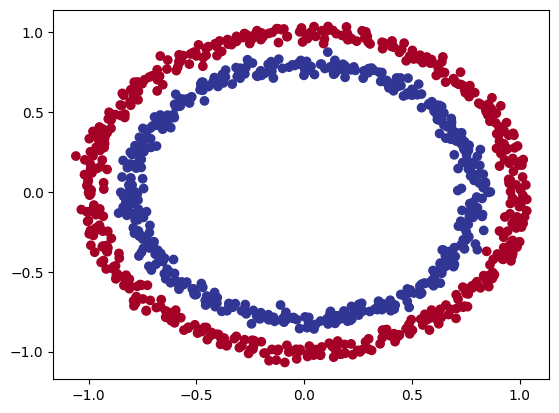

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Steps in modelling

In [8]:
tf.random.set_seed(42)
random_state = 42
random.seed(42)

# Data Preprocessing
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Definition
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model_3.compile(
    loss='binary_crossentropy',  # Appropriate loss function for binary classification
    optimizer='adam',            # Adam optimizer is generally a good choice
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Fit the model to the data
history = model_3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,                 # Number of epochs; adjust based on your need
    batch_size=32,               # Batch size for training; can be tuned
    callbacks=[early_stopping]
)

# To evaluate the model, you can use:
evaluation = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6883 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5038 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.5000 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 908us/step - loss: 0.6705 - accuracy: 0.5462 - val_loss: 0.6754 - val_accuracy: 0.5200
Epoch 5/100
25/25 [==============================] - 0s 825us/step - loss: 0.6610 - accuracy: 0.5175 - val_loss: 0.6642 - val_accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 915us/step - loss: 0.6451 - accuracy: 0.6787 - val_loss: 0.6476 - val_accuracy: 0.6550
Epoch 7/100
25/25 [==============================] - 0s 901us/step - loss: 0.6199 - accuracy: 0.7713 - val_loss: 0.6188 - val_accuracy: 0.7150
Epoch

## Plot History Train and Test

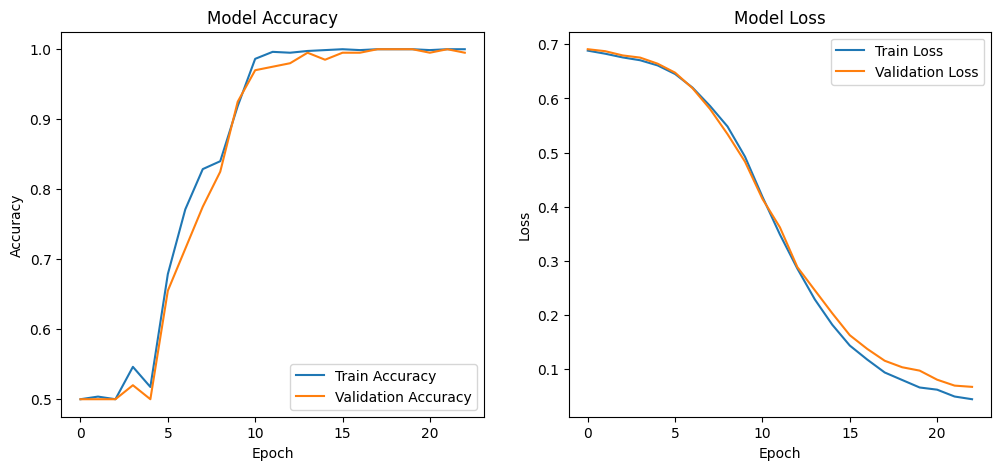

In [10]:
# Plotting the training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Decision Boundary Plotting

31250/31250 [==============================] - 7s 211us/step


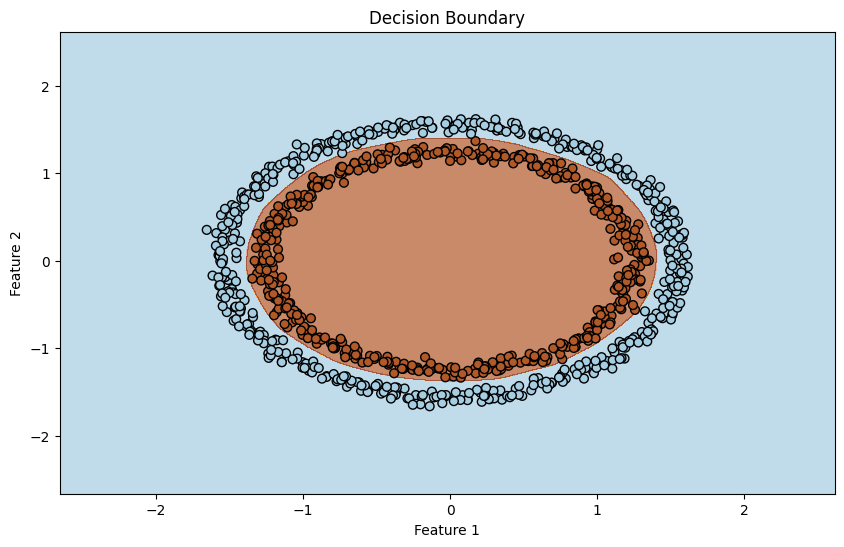

In [14]:
def plot_decision_boundary(model, X, y, steps=1000, cmap='Paired'):
    """
    Plots the decision boundary created by a model predicting on X.
    :param model: The trained model (must have a .predict() method).
    :param X: The input features (must be 2D).
    :param y: The target labels.
    :param steps: Resolution of the meshgrid.
    :param cmap: Colormap for the plot.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps), 
                         np.linspace(y_min, y_max, steps))
    
    # Create a grid of points and predict the class for each point
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)
    preds = (preds > 0.5).astype(int)  # Convert probabilities to class labels

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, preds, alpha=0.7, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Example usage with your trained model and data
plot_decision_boundary(model_3, X_scaled, y)

313/313 [==============================] - 0s 266us/step


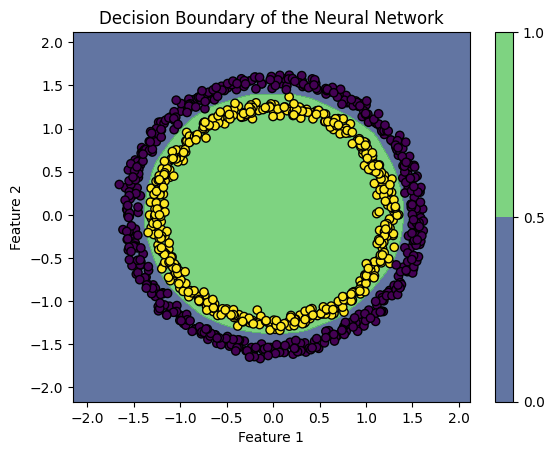

In [11]:
# Create a mesh grid for plotting decision boundary
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predicting values for each point on the grid
Z = model_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3))
plt.colorbar()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolor='k')
plt.title("Decision Boundary of the Neural Network")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Next